Aim: Implement K means algorithm dataset from UCI repository

Dataset: Mall Customer Segmentation Dataset

In [126]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [127]:
df = pd.read_csv('Mall_Customers.csv')  

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [128]:

df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

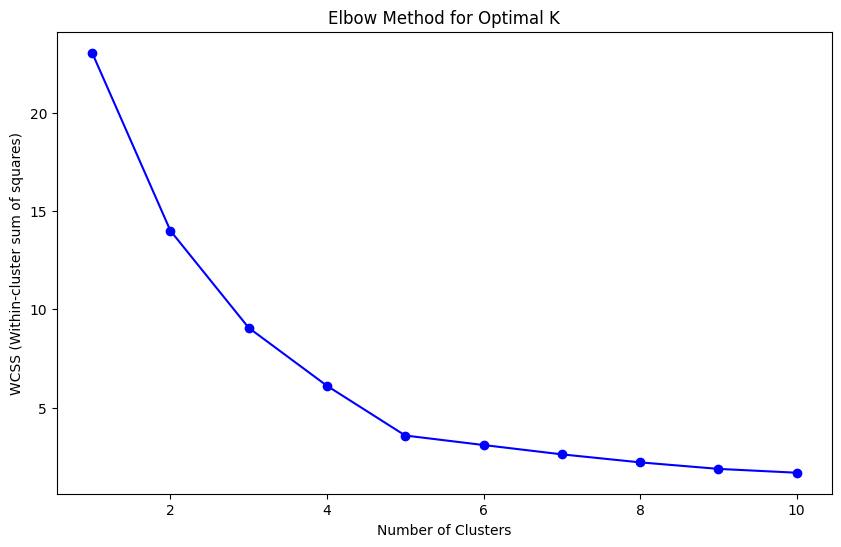

In [129]:

# Elbow method to find the optimal number of clusters
wcss = []  
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()


In [130]:
# Fit K-Means with the optimal K 
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)

df['Cluster'] = y_kmeans

print(df.head())


   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        4
1   21                  15                      81        0
2   20                  16                       6        4
3   23                  16                      77        0
4   31                  17                      40        4


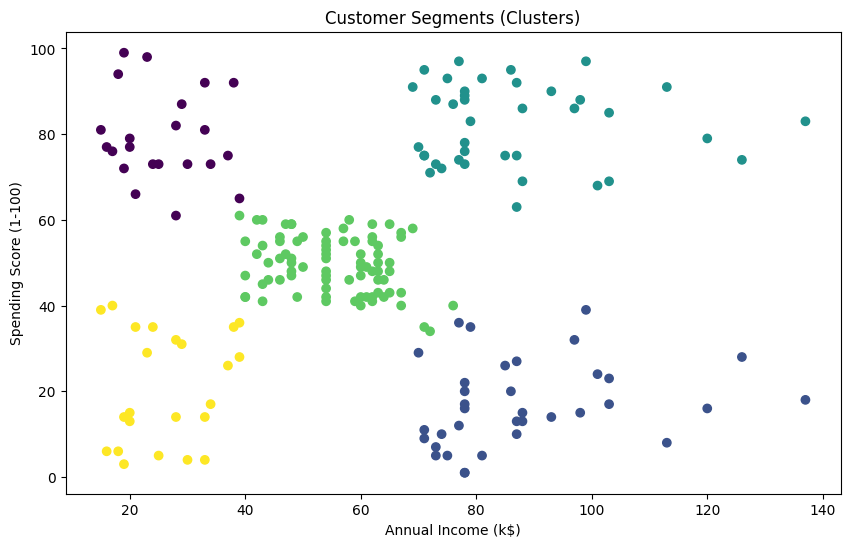

In [131]:
# Plotting the clusters
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments (Clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [132]:
# Group by cluster and calculate mean values
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        25.272727           25.727273               79.363636
1        41.114286           88.200000               17.114286
2        32.692308           86.538462               82.128205
3        42.716049           55.296296               49.518519
4        45.217391           26.304348               20.913043


In [133]:

sil_score = silhouette_score(scaled_data, y_kmeans)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.5594854531227246
